<a href="https://colab.research.google.com/github/flowonthegoliv/ENVS666_2023/blob/main/Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this second tutorial, we will start by following the same steps as before and retrieve the necessary data through reading. To achieve this, we must first confirm that we have all the required libraries installed, just as we did in the previous tutorial. Once we have verified our setup, we can proceed by downloading the plume data from the website link provided below.

http://jonnyhigham.co.uk/PLUMEAIR/

To make things easier for you, I have included filters on the website that you can use to download the data. Alternatively, we can read the data into Python for statistical analysis and then re-download it to import into QGIS. This approach will provide you with greater flexibility in analyzing the data.


In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('all_sensors_download.csv')

datetime = pd.to_datetime(df['Date & Time'].array)
no2 = df['NO2 (ppb)'].to_numpy()
lat = df['latitude'].to_numpy()
lon = df['longitude'].to_numpy()
pm2p5 = df['PM2.5 (µg/m3)'].to_numpy()
pm10 = df['PM10 (µg/m3)'].to_numpy()
sorted = np.argsort(datetime)
datetime = datetime[sorted]
no2 = no2[sorted]
pm2p5 = pm2p5[sorted]
pm10p0 = pm10[sorted]

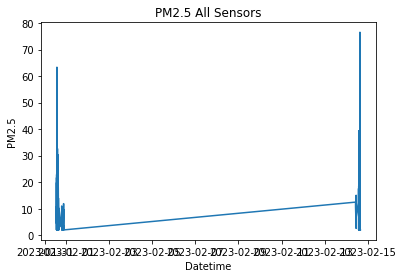

In [25]:
# Plot the data as a line graph
plt.plot(datetime,pm2p5)

# Set the plot title and labels
plt.title("PM2.5 All Sensors")
plt.ylabel("PM2.5")
plt.xlabel("Datetime")

# Show the plot
plt.show()

Maybe we could even scattter the data 

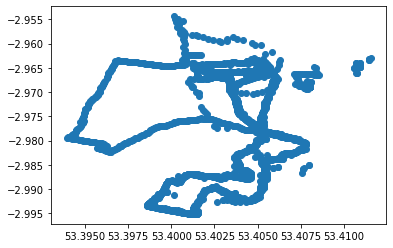

In [27]:
plt.scatter(lon,lat)

We could dome some statistics based on time...

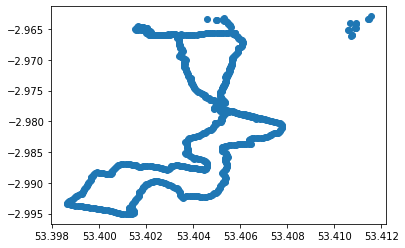

In [33]:
#only when in feb
masked = datetime.month==2

feb_datetime=datetime[masked]
feb_lon=lon[masked]
feb_lat=lat[masked]
feb_pm2p5=pm2p5[masked]
feb_pm10p0=pm10p0[masked]
feb_no2=no2[masked]

plt.scatter(feb_lon,feb_lat)

We can even write these back to a *.csv

In [43]:
dataframe = pd.DataFrame([feb_datetime,feb_lon,feb_lat,feb_pm2p5,feb_pm10p0,feb_no2])
pd.DataFrame.to_csv(dataframe,'new_data.csv',index=False)

Next, we will attempt to read this data in QGIS and create plots using the delimiter tool. By utilizing this tool, you will have the ability to distinguish between pollutant concentrations by assigning unique colors.

During the past few weeks, you have been collecting data in the comfort of your own homes. The data collected can be downloaded through the link provided below. I want to reassure you that I have not shared any of your personal information or sensor locations with anyone. The data available for download is in CSV format, and we will be following the same steps as before to conduct basic analysis on the data.

http://www.jonnyhigham.co.uk/ENVS666/

In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# you just need to change this line for your sensor
df = pd.read_csv('sensor_12.csv', sep=';')

datetime = pd.to_datetime(df['Date & Time'].array)
pm2p5 = df['PM1.0'].to_numpy()
pm10 = df['PM2.5'].to_numpy()
temp = df['Temperature'].to_numpy()
humd = df['Humidity'].to_numpy()
sorted = np.argsort(datetime)
datetime = datetime[sorted]
pm2p5 = pm2p5[sorted]
pm10p0 = pm10[sorted]
temp = temp[sorted]
humd = humd[sorted]

While I understand that some of you may prefer to use Excel, I strongly encourage you to persevere with Python. This is a crucial skill to have as we progress further into the field of data science, and mastering these skills could greatly improve your employability in the future.

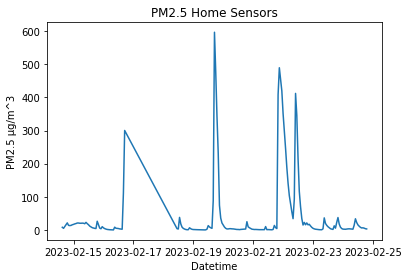

In [66]:
# Plot the data as a line graph
plt.plot(datetime,pm2p5)

# Set the plot title and labels
plt.title("PM2.5 Home Sensors")
plt.ylabel("PM2.5 µg/m^3")
plt.xlabel("Datetime")

# Show the plot
plt.show()

Text(0.5, 0, 'Days')

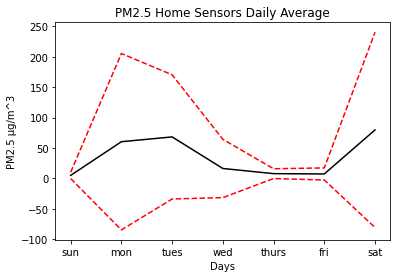

In [67]:
#lets calculate the daily average

av_mon = np.nanmean(pm2p5[datetime.dayofweek==0])
av_tue = np.nanmean(pm2p5[datetime.dayofweek==1])
av_wed = np.nanmean(pm2p5[datetime.dayofweek==2])
av_thu = np.nanmean(pm2p5[datetime.dayofweek==3])
av_fri = np.nanmean(pm2p5[datetime.dayofweek==4])
av_sat = np.nanmean(pm2p5[datetime.dayofweek==5])
av_sun = np.nanmean(pm2p5[datetime.dayofweek==6])

std_mon = np.nanstd(pm2p5[datetime.dayofweek==0])
std_tue = np.nanstd(pm2p5[datetime.dayofweek==1])
std_wed = np.nanstd(pm2p5[datetime.dayofweek==2])
std_thu = np.nanstd(pm2p5[datetime.dayofweek==3])
std_fri = np.nanstd(pm2p5[datetime.dayofweek==4])
std_sat = np.nanstd(pm2p5[datetime.dayofweek==5])
std_sun = np.nanstd(pm2p5[datetime.dayofweek==6])


days = np.array(['sun','mon','tues','wed','thurs','fri','sat'])
avs = np.array([av_mon,av_tue,av_wed,av_thu,av_fri,av_sat,av_sun])
stds = np.array([std_mon,std_tue,std_wed,std_thu,std_fri,std_sat,std_sun])

plt.plot(days,avs,'k')
plt.plot(days,avs+stds,'r--')
plt.plot(days,avs-stds,'r--')
plt.title("PM2.5 Home Sensors Daily Average")
plt.ylabel("PM2.5 µg/m^3")
plt.xlabel("Days")